In [441]:
##load modules /libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

In [313]:
#load dataset 
train_data_path = r"/Users/sumedha/Desktop/skillcraft /data/train.csv" 
test_data_path = r"/Users/sumedha/Desktop/skillcraft /data/train.csv"

df_train = pd.read_csv (train_data_path)
df_test = pd.read_csv (test_data_path)

print("shape of df_train : " , df_train.shape)
print("shape of df_test: ", df_test.shape)

shape of df_train :  (1460, 81)
shape of df_test:  (1460, 81)


In [314]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [315]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [316]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [317]:
#data integration 

In [318]:
df = pd.concat([df_train, df_test])
print("shape of integrated data : ", df.shape)

shape of integrated data :  (2920, 81)


In [319]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [320]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [322]:
#most null value feature
#alley
#fireplacequ
#poolqc
#fence
#miscfeature


In [323]:
int_features = df.select_dtypes(include = ["int64"]).columns
print("total no of integer features : " , int_features.shape[0])

print("integer feature names : ", int_features.tolist())

total no of integer features :  35
integer feature names :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [324]:
float_features = df.select_dtypes(include = ["float64"]).columns
print("total no of floating features : " , float_features.shape[0])

print("floating feature names : ", int_features.tolist())

total no of floating features :  3
floating feature names :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [325]:
cat_features = df.select_dtypes(include = ["object"]).columns
print("total no of categorical features : " , cat_features.shape[0])

print("categorical feature names : ", cat_features.tolist())

total no of categorical features :  43
categorical feature names :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [326]:
#get the statistical information of numerical features 

In [327]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2758.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.537785,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,441.791261,438.630172,386.521513,436.453656,48.614752,525.390365,0.518822,0.238712,0.550821,0.502799,0.815638,0.220300,1.625115,0.644556,24.685247,0.747187,213.768215,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [328]:
df.describe().shape

(8, 38)

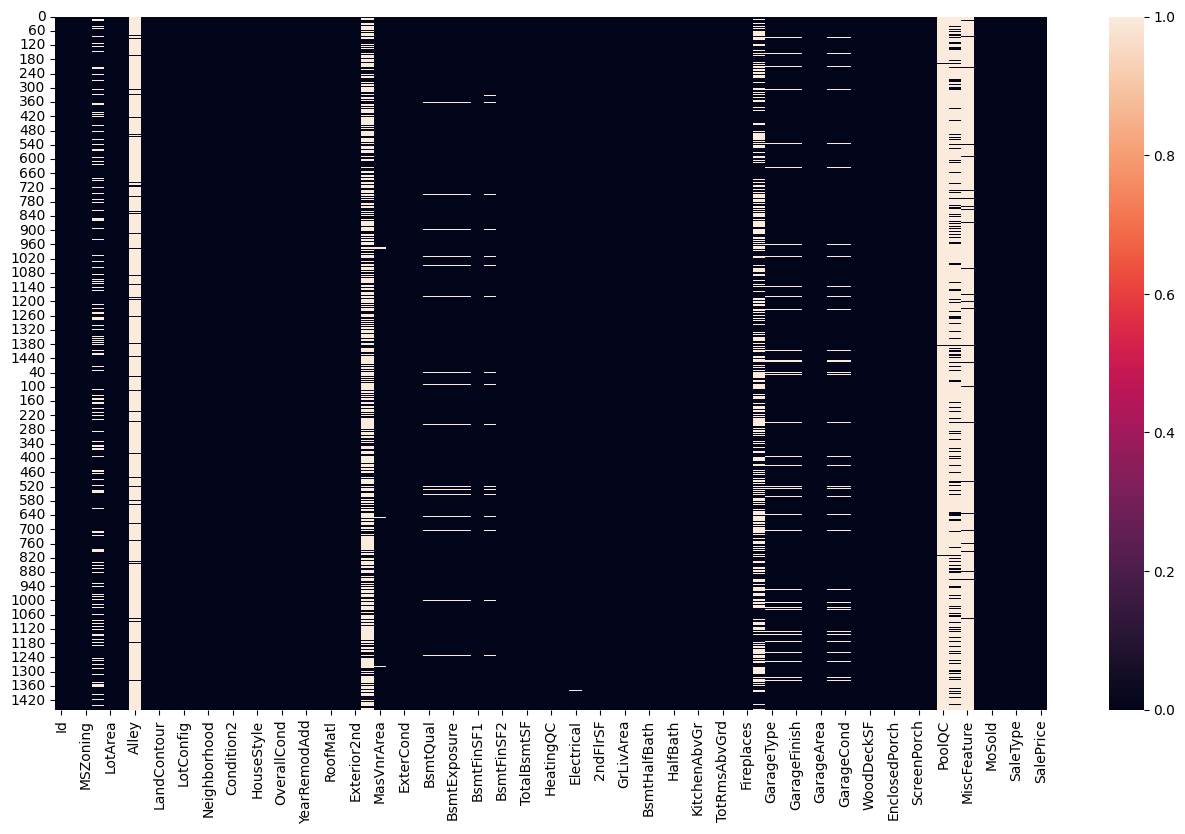

In [329]:
#finding missing values 
plt.figure(figsize = (16,9))
sns.heatmap(df.isnull())
plt.savefig(" ")


In [330]:
#set index as id column 
df = df.set_index('Id')

In [331]:
null_count = df.isnull().sum()
null_count 

MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
Alley            2738
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType       1744
MasVnrArea         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           74
BsmtCond           74
BsmtExposure       76
BsmtFinType1       74
BsmtFinSF1          0
BsmtFinType2       76
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          2
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [332]:
#get the null value percentage for every feature 
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent 

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [333]:
#drop columns
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc 

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [334]:
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent <21)]
miss_value_5_20_perc 

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

<Axes: ylabel='Id'>

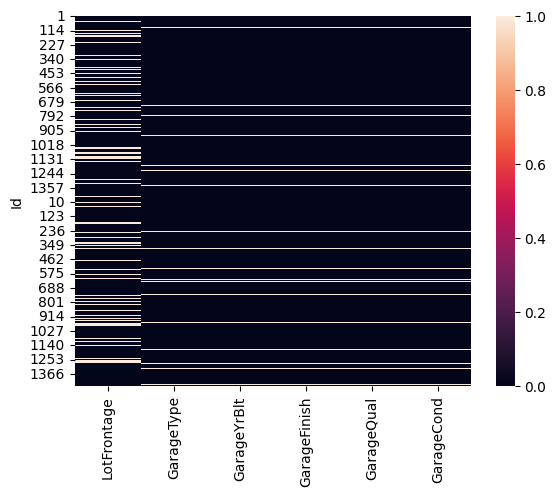

In [335]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [336]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing values features = " , len(missing_value_feat))

total missing values features =  19


In [337]:
missing_value_feat

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [338]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total no of categorical missing features = " ,len(cat_na_feat))
cat_na_feat

total no of categorical missing features =  16


Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [339]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total no of integer missing features = " ,len(int_na_feat))
int_na_feat

total no of integer missing features =  0


Series([], dtype: float64)

In [340]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total no of float  missing features = " ,len(float_na_feat))
float_na_feat

total no of float  missing features =  3


LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [341]:
#handling MSZoning = 0.137033

In [342]:
df["MSZoning"].value_counts()

MSZoning
RL         2302
RM          436
FV          130
RH           32
C (all)      20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

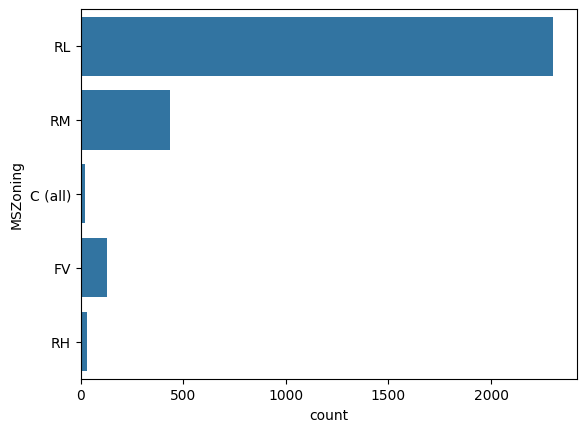

In [343]:
sns.countplot(df["MSZoning"])

In [344]:
### backup of original data 
df_mvi = df.copy()
df_mvi.shape

(2920, 80)

In [345]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan , mszoning_mode, inplace= True)
df_mvi["MSZoning"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/3884107883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan , mszoning_mode, inplace= True)


0

In [346]:
def oldnewcountplot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title('old data distribution')
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title('New data distribution')

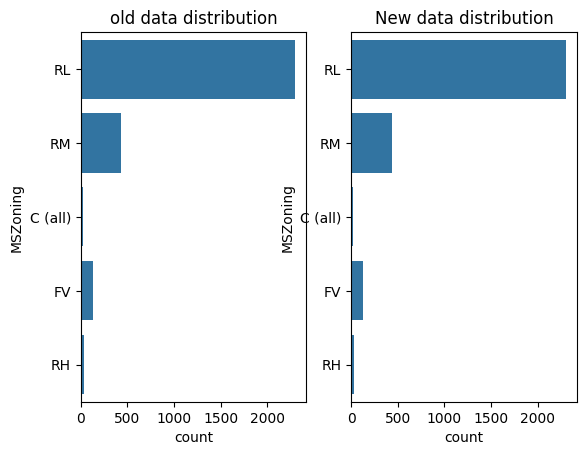

In [347]:
oldnewcountplot(df, df_mvi, "MSZoning")

In [348]:
## handling alley = 93.216855

In [349]:
df_mvi["Alley"].value_counts()

Alley
Grvl    100
Pave     82
Name: count, dtype: int64

In [350]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan , alley_cont , inplace = True)
df_mvi['Alley'].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/3645688684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan , alley_cont , inplace = True)


0

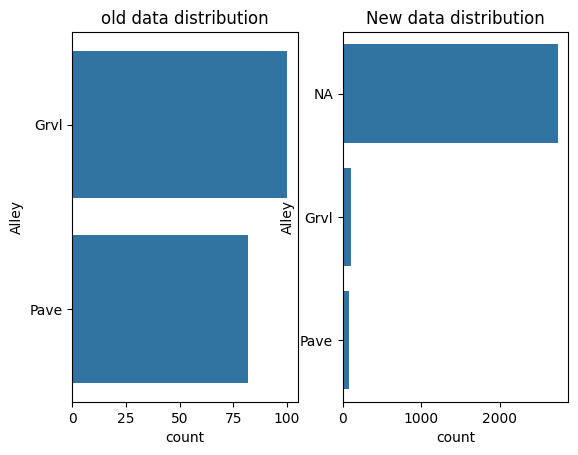

In [351]:
oldnewcountplot(df, df_mvi, "Alley")

In [352]:
## handling lotfrontage = 16.649538

In [353]:
def boxHistPlot(df, figsize= (16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot
    sns.histplot(df)

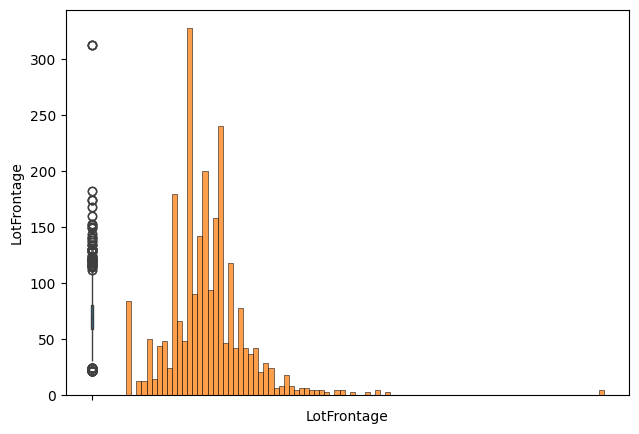

In [354]:
boxHistPlot(df["LotFrontage"])

In [355]:
lotlrontage_mean = df['LotFrontage'].mean()
df_mvi["LotFrontage"].replace(np.nan , lotlrontage_mean,inplace = True)
df_mvi['LotFrontage'].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1321867421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan , lotlrontage_mean,inplace = True)


0

In [356]:
def oldNewboxHistPlot(df, df_new, feature, figsize = (16,10)):
     plt.figure(figsize=figsize)
     plt.subplot(221)
     sns.boxplot(df[feature] )
     plt.title("Old Data Distribution")
     plt.subplot(222)
     sns.distplot(df[feature])
     plt.title("Old Data Distribution")

     plt. subplot(223)
     sns.boxplot(df_new[feature])
     plt. title("New Data Distribution")
     plt. subplot (224)
     sns.distplot(df_new[feature])
     plt.title("New Data Distribution")


/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1263759869.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1263759869.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


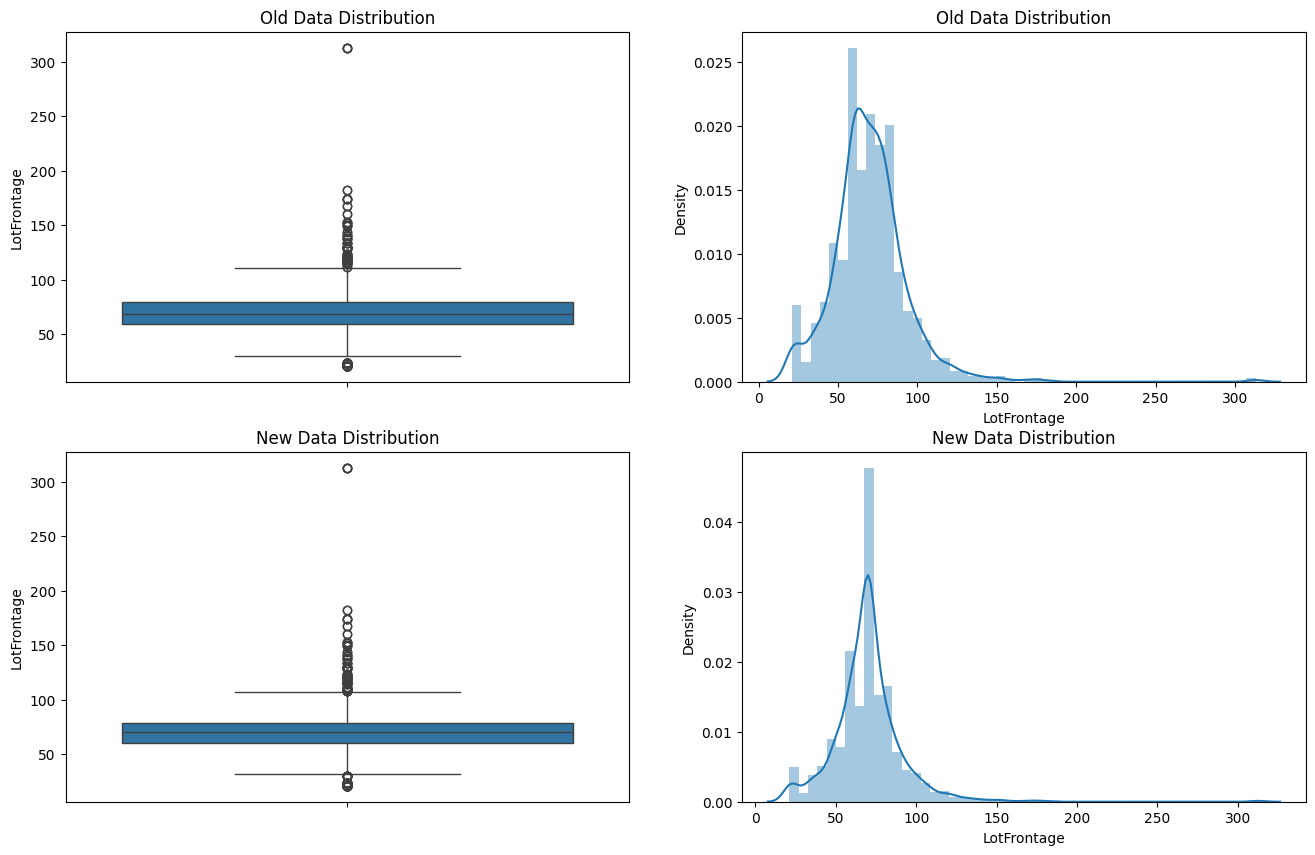

In [357]:
oldNewboxHistPlot(df, df_mvi, "LotFrontage")

In [358]:
##handling utilities

In [359]:
df['Utilities'].value_counts()

Utilities
AllPub    2918
NoSeWa       2
Name: count, dtype: int64

In [360]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace= True)
df_mvi['Utilities'].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/2476949282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace= True)


0

In [361]:
##handling exyerior first 


In [362]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace = True)
print("E1st is null: ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_mvi["Exterior2nd"].isnull().sum())



E1st is null:  0
E2nd is null:  0


/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1479490194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace = True)
/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1479490194.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [363]:
##handling MasVnrType  and MasVnrarea

<Axes: ylabel='Id'>

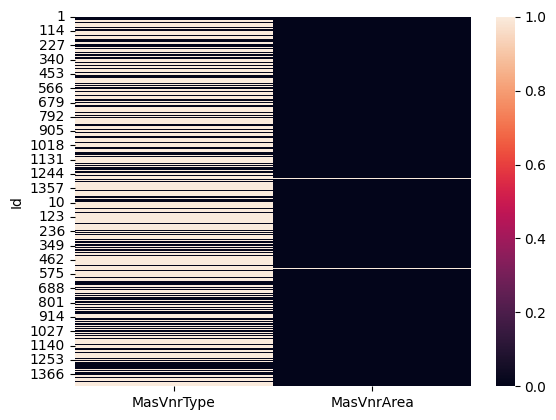

In [364]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [365]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    890
Stone      256
BrkCmn      30
Name: count, dtype: int64

In [366]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan , masvnrtype_mode , inplace = True )
df_mvi["MasVnrType"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/3838165619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan , masvnrtype_mode , inplace = True )


0

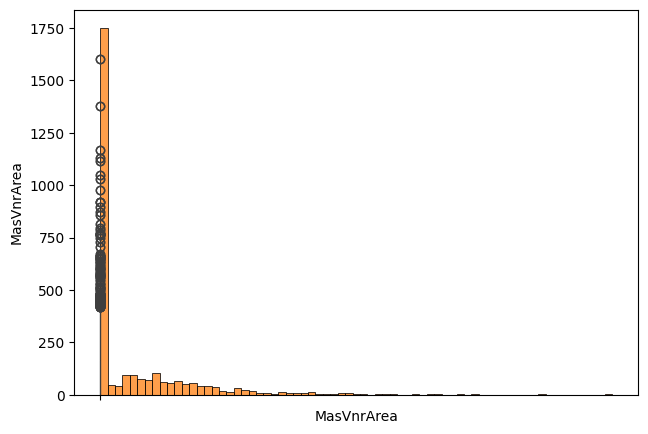

In [367]:
boxHistPlot(df["MasVnrArea"])

In [368]:
masvnrarea_mode = 0
df_mvi["MasVnrType"].replace(np.nan , masvnrarea_mode , inplace = True )
df_mvi["MasVnrType"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/138692240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan , masvnrarea_mode , inplace = True )


0

In [369]:
cat_bsmt_feat = [
"BsmtQual"  ,    
"BsmtCond"   , 
"BsmtExposure" ,
"BsmtFinType1" ,
"BsmtFinType2" , 
]

num_bsmt_feat = [
"BsmtFinSF1"  ,
"BsmtFinSF2" ,   
"BsmtUnfSF"  , 
"TotalBsmtSF", 
"BsmtFullBath" ,
"BsmtHalfBath"]



<Axes: ylabel='Id'>

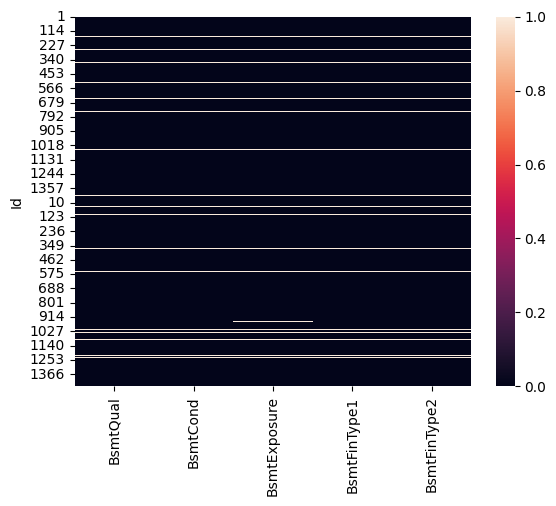

In [370]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [371]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: BsmtQual
TA    1298
Gd    1236
Ex     242
Fa      70
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2622
Gd     130
Fa      90
Po       4
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1906
Av     442
Gd     268
Mn     228
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    860
GLQ    836
ALQ    440
BLQ    296
Rec    266
LwQ    148
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2512
Rec     108
LwQ      92
BLQ      66
ALQ      38
GLQ      28
Name: count, dtype: int64


In [372]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont, inplace = True)

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/3127299250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_cont, inplace = True)


In [373]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

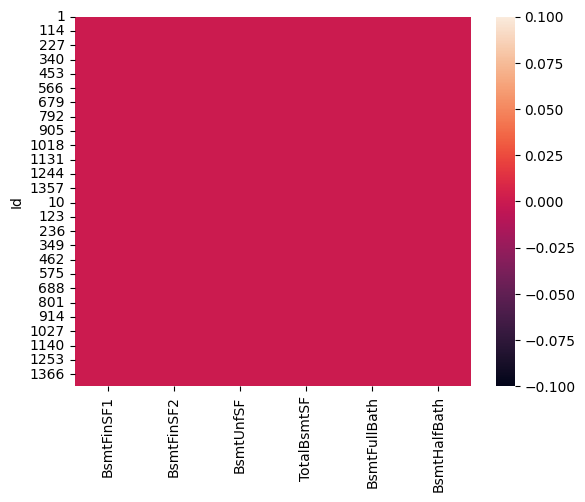

In [374]:
sns.heatmap (df[num_bsmt_feat].isnull())

In [375]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt [df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
40,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
91,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
103,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
183,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
260,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
333,Gd,TA,No,GLQ,NaN,1124,479,1603,3206,1,0
343,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [376]:
bsmt_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num , inplace = True)
    

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/4026430974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num , inplace = True)


In [377]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [378]:
 ## handling electrical 

In [379]:
df['Electrical'].value_counts()


Electrical
SBrkr    2668
FuseA     188
FuseF      54
FuseP       6
Mix         2
Name: count, dtype: int64

In [380]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1470
Gd    1172
Ex     200
Fa      78
Name: count, dtype: int64

In [381]:
df_ekk = df[["Electrical" , "KitchenQual" , "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1380,NaN,Gd,1


In [382]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode,inplace = True)
df_mvi["Electrical"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/89485740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, electrical_mode,inplace = True)


0

In [383]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan,  kitchenQual_mode,inplace = True)
df_mvi["KitchenQual"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1937554712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan,  kitchenQual_mode,inplace = True)


0

In [384]:
## handling remaining cat features 

In [385]:
df["Functional"].value_counts()

Functional
Typ     2720
Min2      68
Min1      62
Mod       30
Maj1      28
Maj2      10
Sev        2
Name: count, dtype: int64

In [386]:
df["SaleType"].value_counts()

SaleType
WD       2534
New       244
COD        86
ConLD      18
ConLI      10
ConLw      10
CWD         8
Oth         6
Con         4
Name: count, dtype: int64

In [387]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan,  Functional_mode,inplace = True)
df_mvi["Functional"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1136751337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan,  Functional_mode,inplace = True)


0

In [388]:
SaleType_mode = df["SaleType"].mode()[0]

df_mvi["SaleType"].replace(np.nan, SaleType_mode,inplace = True)
df_mvi["SaleType"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/2196605082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, SaleType_mode,inplace = True)


0

In [389]:
other_cat_feat = ["FireplaceQu",'PoolQC', 'Fence',"MiscFeature"]
for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: FireplaceQu
Gd    760
TA    626
Fa     66
Ex     48
Po     40
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Gd    6
Ex    4
Fa    4
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    314
GdPrv    118
GdWo     108
MnWw      22
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    98
Gar2     4
Othr     4
TenC     2
Name: count, dtype: int64


In [390]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont,inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1366536253.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont,inplace = True)


0

In [391]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont,inplace = True)
df_mvi["PoolQC"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/410281787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, poolqc_cont,inplace = True)


0

In [392]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont,inplace = True)
df_mvi["Fence"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/1357383170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, fence_cont,inplace = True)


0

In [393]:
miscfeature = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature,inplace = True)
df_mvi["MiscFeature"].isnull().sum()

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/420379373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan, miscfeature,inplace = True)


0

In [394]:
## handling garage features 

In [395]:
cat_garage_feat = ["GarageArea", "GarageFinish", "GarageQual", "GarageCond"]
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

df_garafe = df[num_garage_feat + cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageArea,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0,0,0,NaN,NaN,NaN
49,NaN,0,0,0,NaN,NaN,NaN
79,NaN,0,0,0,NaN,NaN,NaN
89,NaN,0,0,0,NaN,NaN,NaN
90,NaN,0,0,0,NaN,NaN,NaN
100,NaN,0,0,0,NaN,NaN,NaN
109,NaN,0,0,0,NaN,NaN,NaN
126,NaN,0,0,0,NaN,NaN,NaN
128,NaN,0,0,0,NaN,NaN,NaN


In [396]:
garage_cont = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan, garage_cont , inplace= True)

df_mvi[cat_garage_feat].isnull().sum()   

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/612552380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_cont , inplace= True)


GarageArea      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [397]:
garage_num= 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan, garage_num , inplace= True)

df_mvi[num_garage_feat].isnull().sum()   

/var/folders/dw/1897_2p133d2mnwx3ck_2p0w0000gn/T/ipykernel_3025/2683131541.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, garage_num , inplace= True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [398]:
df_mvi.isnull().any(axis=1).sum()

178

In [399]:
## feature transformation 
## convert numerical feature to categorical feature 

In [400]:
for_num_conv = ["MSSubClass" ,"YearBuilt" , "YearRemodAdd", "GarageYrBlt" , "MoSold" , "YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [401]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [402]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [403]:
calendar.month_abbr[12]

'Dec'

In [404]:
df_mvi['MoSold']= df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [405]:
for feat in for_num_conv:
    df_mvi[feat]= df_mvi[feat].astype(str)

In [406]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


In [407]:
## convert cateorical features into numerical feature 


In [408]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure"
"BsmtFinTypel",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu"
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities"
]

print ("total no of features to convert ordinal numerical format :" , len(ordinal_end_var))

total no of features to convert ordinal numerical format : 16


In [409]:
df_mvi ["ExterQual"].value_counts()

ExterQual
TA    1812
Gd     976
Ex     104
Fa      28
Name: count, dtype: int64

In [410]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA" , "Gd", "Ex"], ordered = True)).cat.codes

In [411]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1812
3     976
4     104
1      28
Name: count, dtype: int64

In [412]:
##one hot encoding for nominal categorical data

In [413]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print("total object data type features : ", len(object_features))

print(" Features : \n", object_features)

total object data type features :  48
 Features : 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [414]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,2003.0,RFn,TA,TA,Y,NA,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,NA,NA,NA,May,2007,WD,Normal


In [415]:
df_encod = pd.get_dummies(df_encod, columns= object_features , prefix= object_features, drop_first= True)

In [416]:
## split data for training and testing 

In [417]:
df_encod.shape

(2920, 547)

In [418]:
len_train = df_train.shape[0]
len_train

1460

In [419]:
X_train = df_encod[:len_train].drop("SalePrice",  axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)
print ("Shape of X_train data : ", X_train.shape)
print ("Shape of y_train data : ", y_train.shape) 
print ("Shape of X_test data : ", X_test.shape)

Shape of X_train data :  (1460, 546)
Shape of y_train data :  (1460,)
Shape of X_test data :  (1460, 546)


In [420]:
#feature scaling 


In [421]:
sc = StandardScaler()
sc.fit(X_train)
# formula = z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [422]:
X_train[:3,:]

array([[-0.22937175, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.4519361 , -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.09311018,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [423]:
X_test[:3,:]

array([[-0.22937175, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.4519361 , -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.09311018,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [424]:
sc.mean_

array([7.00499584e+01, 1.05168281e+04, 6.09931507e+00, 5.57534247e+00,
       1.03685262e+02, 2.39589041e+00, 4.43639726e+02, 4.65493151e+01,
       5.67240411e+02, 1.05742945e+03, 1.16262671e+03, 3.46992466e+02,
       5.84452055e+00, 1.51546370e+03, 4.25342466e-01, 5.75342466e-02,
       1.56506849e+00, 3.82876712e-01, 2.86643836e+00, 1.04657534e+00,
       6.51780822e+00, 6.13013699e-01, 1.76712329e+00, 4.72980137e+02,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 4.34890411e+01, 4.31506849e-02,
       6.84931507e-03, 2.05479452e-02, 3.67123288e-01, 4.72602740e-02,
       2.73972603e-03, 8.21917808e-03, 9.86301370e-02, 2.04794521e-01,
       4.10958904e-02, 1.09589041e-02, 3.97260274e-02, 1.36986301e-02,
       3.56164384e-02, 4.45205479e-02, 1.09589041e-02, 7.88356164e-01,
       1.49315068e-01, 9.95890411e-01, 9.37671233e-01, 2.80821918e-02,
       2.80821918e-02, 6.84931507e-03, 6.33561644e-01, 3.42465753e-02,
      

In [425]:
sc.n_features_in_

546

In [426]:
sc.n_samples_seen_

array([1460, 1460, 1460, 1460, 1452, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460,
       1460, 1460, 1460, 1460, 1460, 1460, 1460, 14

In [427]:
sc.scale_

array([2.20164789e+01, 9.97784611e+03, 1.38252284e+00, 1.11241818e+00,
       1.81003845e+02, 5.74083750e-01, 4.55941866e+02, 1.61264017e+02,
       4.41715605e+02, 4.38555057e+02, 3.86455322e+02, 4.36378914e+02,
       4.86064268e+01, 5.25300394e+02, 5.18732867e-01, 2.38670868e-01,
       5.50727099e-01, 5.02713131e-01, 8.15498620e-01, 2.20262727e-01,
       1.62483655e+00, 6.44445572e-01, 7.47059036e-01, 2.13731608e+02,
       1.25295863e+02, 6.62333334e+01, 6.10982138e+01, 2.93072887e+01,
       5.57383170e+01, 4.01635452e+01, 4.95953090e+02, 2.03196219e-01,
       8.24766752e-02, 1.41865172e-01, 4.82020518e-01, 2.12195053e-01,
       5.22706412e-02, 9.02863400e-02, 2.98164775e-01, 4.03551391e-01,
       1.98512010e-01, 1.04109589e-01, 1.95314798e-01, 1.16236731e-01,
       1.85331885e-01, 2.06248561e-01, 1.04109589e-01, 4.08473650e-01,
       3.56398764e-01, 6.39742160e-02, 2.41751715e-01, 1.65207694e-01,
       1.65207694e-01, 8.24766752e-02, 4.81831181e-01, 1.81861891e-01,
      

In [428]:
sc.var_

array([4.84725344e+02, 9.95574129e+07, 1.91136939e+00, 1.23747420e+00,
       3.27623920e+04, 3.29572152e-01, 2.07882985e+05, 2.60060832e+04,
       1.95112676e+05, 1.92330538e+05, 1.49347716e+05, 1.90426557e+05,
       2.36258473e+03, 2.75940503e+05, 2.69083787e-01, 5.69637831e-02,
       3.03300338e-01, 2.52720492e-01, 6.65038000e-01, 4.85156690e-02,
       2.64009383e+00, 4.15310096e-01, 5.58097204e-01, 4.56812003e+04,
       1.56990532e+04, 4.38685445e+03, 3.73299173e+03, 8.58917168e+02,
       3.10675998e+03, 1.61311037e+03, 2.45969468e+05, 4.12887033e-02,
       6.80240195e-03, 2.01257272e-02, 2.32343779e-01, 4.50267405e-02,
       2.73221993e-03, 8.15162319e-03, 8.89022331e-02, 1.62853725e-01,
       3.94070182e-02, 1.08388065e-02, 3.81478701e-02, 1.35109777e-02,
       3.43479077e-02, 4.25384688e-02, 1.08388065e-02, 1.66850722e-01,
       1.27020079e-01, 4.09270032e-03, 5.84438919e-02, 2.72935823e-02,
       2.72935823e-02, 6.80240195e-03, 2.32161287e-01, 3.30737474e-02,
      

In [429]:
sc.with_mean

True

In [430]:
sc.with_std

True

In [431]:
#train ml model 

In [433]:
!pip3 install xgboost

7365.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 777.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


In [444]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor



In [445]:
svr = SVR()
lr = LinearRegression ()
sgdr = SGDRegressor ()
knr = KNeighborsRegressor ()
gpr = GaussianProcessRegressor ()
dtr = DecisionTreeRegressor ()
gbr = GradientBoostingRegressor ()
rfr = RandomForestRegressor

mlpr = MLPRegressor()
ir = IsotonicRegression()

In [447]:
models = { "a": ["LinearRegression", lr],
           "b" : ["SVR", svr],
           "c" : ["SGDRegressor", sgdr],
           "d" : ["KNeighborsRegressor"
, knr],
           "e" : ["GaussianProcessRegressor", gpr],
           "f": ["DecisionTreeRegressor", dtr],
           "g" : ["GradientBoostingRegressor", gbr],
           "h" : ["RandomForestRegressor", rfr],
           
           "i" : ["MLPRegressor", mlpr],
           "j" : ["IsotonicRegression", ir] }

In [460]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train= X_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer (r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean ()]
    return score

In [463]:
models_score = [ ]
for model in models:
    print("training model : ", models [model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("score of model : ", score)
    models_score.append([models[model][0],score[0]])

training model :  LinearRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 578, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1049, in check_array
    _assert_all_finite(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [465]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Collection (Hypothetical Dataset)
data = {
    'square_footage': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
    'bedrooms': [3, 3, 3, 4, 4, 4, 5, 5, 5, 5],
    'bathrooms': [2, 2, 2, 3, 3, 3, 4, 4, 4, 4],
    'price': [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000]
}

df = pd.DataFrame(data)

# Step 2: Data Preprocessing
# In this case, our dataset is already clean and does not require any preprocessing.

# Step 3: Model Implementation
X = df[['square_footage', 'bedrooms', 'bathrooms']]
y = df['price']

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 6: Prediction
# Predicting the price of a house with 2500 square footage, 5 bedrooms, and 4 bathrooms
new_house = np.array([[2500, 5, 4]])
predicted_price = model.predict(new_house)
print(f"Predicted Price: {predicted_price[0]}")


Mean Squared Error: 1.6940658945086007e-21
R² Score: 1.0
Predicted Price: 499999.99999999994


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
